## MLG Diabetes Melitus (Caso binomial)
#### Grupo2

Consideramos un conjunto de datos que tiene como objetivo estudiar la probabilidad de que una persona tenga diabetes Mellitus
Se define Y=1 si el adulto tiene diabetes y Y=0 si el adulto no tiene diabetes.
no tiene ninguno. Se consideran tres variables explicativas:

* **peso** 
* **talla** 
* **imc**  
* **cintura** 
* **pantorrilla** 
* **branquial** 
* **puntajepruebas**
* **diabetes** Autorreporte de diabetes mellitus (diabetes=1, tiene diabetes mellitus, diabetes=0 no tiene diabetes mellitus). **Esta es considerada como la RTA**


* $m_k Y_k \sim Binomial(m_k, \mu_k)$
* $\mu_k$ : El número de ensayos. es igual a 1

In [40]:
getwd()
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")#asignando capeta busqueda

[1] "C:/Users/YULY/Desktop/Desktop/UNAL 2018/MLGz/MLG Vanegas"

In [41]:
library(readxl)
d <- read_excel("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\consultoria\\consultoria numero 2\\datosanalisis.xlsx")
d$AUTOREPORTE_DIABETES[d$AUTOREPORTE_DIABETES == 2] <- 0
head(d)

PESO,TALLA,IMC,I_IMC,CINTURA,I_CINTURA,PANTORRILLA,I_PANTORRILLA,BRANQUIAL,I_BRAQUIAL,...,PUNTAJE_SPPB_V,PUNTAJE_SPPB_I,SPPB_FINAL,ESTADO DE LA PERSONA,AUTOREPORTE_DIABETES,COLESTEROL_HDL,COLESTEROL_LDL,TRIGLICERIDOS,GLUCOSA,COLESTEROL_TOTAL
91.6,158.5,36.46170,OBESIDAD II,102.0,EXCESO GRASA ABDOMINAL,40.0,ADECUADO,35.0,ADECUADO,...,1,2,206.2285,CON,1,52,117,223,97,192
59.9,164.9,22.02853,NORMOPESO,94.4,EXCESO GRASA ABDOMINAL,31.1,ADECUADO,26.9,ADECUADO,...,1,3,207.5598,SIN,0,43,125,91,88,183
65.5,173.1,21.85985,PESO INSUFICIENTE,91.5,EXCESO GRASA ABDOMINAL,35.5,ADECUADO,26.7,ADECUADO,...,1,2,224.0713,SIN,0,33,117,134,90,167
63.2,145.7,29.77131,SOBREPESO,97.6,EXCESO GRASA ABDOMINAL,36.5,ADECUADO,30.5,ADECUADO,...,1,3,234.6934,SIN,0,59,87,77,79,161
70.2,153.5,29.79342,SOBREPESO,102.2,EXCESO GRASA ABDOMINAL,36.4,ADECUADO,31.5,ADECUADO,...,1,1,198.2449,CON,1,41,60,100,223,114
59.1,148.1,26.94495,NORMOPESO,82.5,EXCESO GRASA ABDOMINAL,34.2,ADECUADO,26.7,ADECUADO,...,1,3,208.1749,SIN,0,32,114,180,95,176


In [42]:
d1<-d[,c(1,2,3,5,7,8,9,10,14,16,17,18,19,20,21)]
d2 <-within(d1,{I_PANTORRILLA <- factor(I_PANTORRILLA, levels=c("RIESGO","ADECUADO") )})
d2 <-within(d2,{I_BRAQUIAL <- factor(I_BRAQUIAL, levels=c("RIESGO","ADECUADO") )})
head(d2,n=10)

PESO,TALLA,IMC,CINTURA,PANTORRILLA,I_PANTORRILLA,BRANQUIAL,I_BRAQUIAL,SPPB_FINAL,AUTOREPORTE_DIABETES,COLESTEROL_HDL,COLESTEROL_LDL,TRIGLICERIDOS,GLUCOSA,COLESTEROL_TOTAL
91.6,158.5,36.46170,102.0,40.0,ADECUADO,35.0,ADECUADO,206.2285,1,52,117,223,97,192
59.9,164.9,22.02853,94.4,31.1,ADECUADO,26.9,ADECUADO,207.5598,0,43,125,91,88,183
65.5,173.1,21.85985,91.5,35.5,ADECUADO,26.7,ADECUADO,224.0713,0,33,117,134,90,167
63.2,145.7,29.77131,97.6,36.5,ADECUADO,30.5,ADECUADO,234.6934,0,59,87,77,79,161
70.2,153.5,29.79342,102.2,36.4,ADECUADO,31.5,ADECUADO,198.2449,1,41,60,100,223,114
59.1,148.1,26.94495,82.5,34.2,ADECUADO,26.7,ADECUADO,208.1749,0,32,114,180,95,176
62.3,157.0,25.27486,88.5,38.2,ADECUADO,30.1,ADECUADO,185.0980,0,42,93,135,99,153
53.5,149.0,24.09801,81.5,35.5,ADECUADO,25.0,ADECUADO,233.7999,0,34,140,127,87,198
71.8,151.7,31.19991,97.3,32.1,ADECUADO,32.5,ADECUADO,182.7249,0,27,80,269,98,151
49.5,152.0,21.42486,83.2,39.2,ADECUADO,26.6,ADECUADO,216.7059,0,41,158,137,97,216


In [43]:
require(dplyr)
a<-filter(d2,AUTOREPORTE_DIABETES==1)
b<-filter(d2,AUTOREPORTE_DIABETES==0)
mean(a$CINTURA)
mean(b$CINTURA)

[1] 94.67476

[1] 91.16624

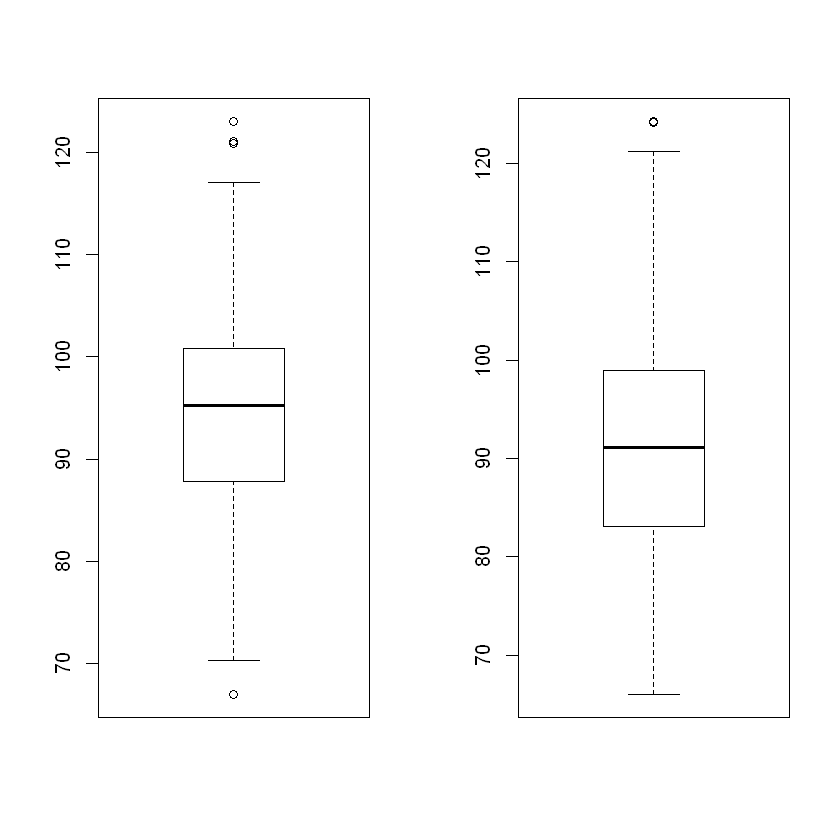

In [44]:
par(mfrow=c(1,2))
boxplot(a$CINTURA)
boxplot(b$CINTURA)

En lo que corresponde a las información anteriormente suministrada se logra identificar que el color está determinado por Dark=Oscuro y Bright=Brillante, considerando que la respuesta $Y$ es bernoulli, se genera el siguiente modelo lineal generealizado con función de enlace logit:


In [46]:
eta<-  AUTOREPORTE_DIABETES~ PESO*TALLA*IMC*CINTURA*PANTORRILLA*BRANQUIAL*SPPB_FINAL
#eta <- AUTOREPORTE_DIABETES~ 1 + IMC*CINTURA

#eta <- AUTOREPORTE_DIABETES~ 1 + IMC*CINTURA*COLESTEROL_HDL*COLESTEROL_LDL*TRIGLICERIDOS*GLUCOSA*COLESTEROL_TOTAL
#eta <- AUTOREPORTE_DIABETES~ 1 + IMC*CINTURA*COLESTEROL_HDL*COLESTEROL_LDL*TRIGLICERIDOS*COLESTEROL_TOTAL
#eta <- AUTOREPORTE_DIABETES~ 1 + IMC*CINTURA*GLUCOSA*COLESTEROL_TOTAL
#eta <- AUTOREPORTE_DIABETES~ 1 + CINTURA*GLUCOSA*COLESTEROL_TOTAL
#eta <- AUTOREPORTE_DIABETES~ 1 + CINTURA*GLUCOSA

#logit_v
fit11<-glm(eta, family = binomial("logit"), data = d2)

#probit_v
fit21<-glm(eta, family = binomial("probit"), data = d2)

#loglog_v
fit31<-glm(eta, family = binomial("cloglog"), data = d2)
#cloglog es complementary loglog, que pasa con el 0...

#cauchy_v
fit41<-glm(eta, family = binomial( "cauchit"), data = d2)

#AIC(fit11,fit21,fit31,fit41)
BIC(fit11,fit21,fit31,fit41)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,df,BIC
fit11,128,1239.773
fit21,128,1240.021
fit31,128,1238.237
fit41,128,9165.938



### Función de enlace logit

In [62]:
summary(fit11)


Call:
glm(formula = eta, family = binomial("logit"), data = d2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.30741  -0.56848  -0.34574  -0.03274   2.82754  

Coefficients:
                                                          Estimate Std. Error
(Intercept)                                              2.784e+05  1.316e+06
PESO                                                    -1.142e+06  9.050e+05
TALLA                                                   -2.136e+03  8.500e+03
IMC                                                     -9.651e+05  7.412e+05
CINTURA                                                 -2.240e+03  1.564e+04
PANTORRILLA                                             -1.675e+04  3.976e+04
BRANQUIAL                                                3.149e+03  5.054e+04
SPPB_FINAL                                              -1.934e+03  5.946e+03
PESO:TALLA                                               2.410e+03  1.940e+03
PESO:IMC        

In [63]:
source("macros.txt")
step_glm(fit11,direction = "forward",criterion = "BIC")  # direction="backward" o "forward"


  Family:  binomial 
    Link:  logit 

Initial model:
AUTOREPORTE_DIABETES ~ 1  

Step 0 :    
              Df      BIC      AIC   Deviance+ Pearson^ p-value*
+ CINTURA      1   574.0813 565.1151    0.0134   0.0045   0.0038
+ IMC          1   574.9044 565.9382    0.0120   0.0054   0.0054
+ PESO         1   575.3848 566.4186    0.0111   0.0029   0.0070
<none>             576.1016 571.6185    0.0000   0.0000         
+ BRANQUIAL    1   576.8210 567.8548    0.0086   0.0009   0.0165
+ PANTORRILLA  1   579.9365 570.9703    0.0031  -0.0016   0.1026
+ SPPB_FINAL   1   582.5617 573.5955   -0.0015  -0.0015   0.8796
+ TALLA        1   582.5674 573.6012   -0.0015  -0.0015   0.8953

Step 1 :  + CINTURA 
              Df      BIC      AIC   Deviance+ Pearson^ p-value*
<none>             574.0813 565.1151    0.0134   0.0045         
+ IMC          1   579.9764 566.5270    0.0129   0.0048   0.4415
+ BRANQUIAL    1   580.1477 566.6983    0.0126   0.0032   0.5181
+ PESO         1   580.3156 566.8663

In [65]:
#fit1<-glm(AUTOREPORTE_DIABETES~CINTURA, family = binomial("cloglog"), data = d2)
fit2<-glm(AUTOREPORTE_DIABETES~CINTURA, family = binomial("logit"), data = d2)
#summary(fit1)

#AIC(fit1)
AIC(fit2)
#cloglog es complementary loglog, que pasa con el 0...

[1] 565.1151

In [66]:
#model.matrix(fit1)                #Matriz modelo
coef(fit2)                         #Estimación de los parámetros
vcov(fit2)                         #Matriz de varianza y covarianza 
#fitted(fit2)                      #Valores ajustados
deviance(fit2)                     #Deviance residual
sum(resid(fit2,type="pearson")^2)  #Estadística de Pearson
-2*logLik(fit2)                    # Log-verosimilitud
AIC(fit2)
BIC(fit2)
attributes(fit2)                  #otros atributos

(Intercept)     CINTURA 
-4.27931617  0.02800857

,(Intercept),CINTURA
(Intercept),0.83899960,-8.794030e-03
CINTURA,-0.00879403,9.347639e-05


[1] 561.1151

[1] 650.0455

'log Lik.' 561.1151 (df=2)

[1] 565.1151

[1] 574.0813

$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

In [67]:
#ESTAS LINEAS ES PARA LLAMAR LAS FUNCIONES REALIZADAS POR EL DOCENTE hernando vanegas
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas") #busca por default en una carpeta en especifica todo.
source("macros.txt")#Lllamar el archivo de macros que está en la carpeta especifica,(son una fuciines especificas del profesor)


step_glm(fit11,direction = "forward",criterion = "BIC")  # direction="backward" o "forward"


  Family:  binomial 
    Link:  logit 

Initial model:
AUTOREPORTE_DIABETES ~ 1  

Step 0 :    
              Df      BIC      AIC   Deviance+ Pearson^ p-value*
+ CINTURA      1   574.0813 565.1151    0.0134   0.0045   0.0038
+ IMC          1   574.9044 565.9382    0.0120   0.0054   0.0054
+ PESO         1   575.3848 566.4186    0.0111   0.0029   0.0070
<none>             576.1016 571.6185    0.0000   0.0000         
+ BRANQUIAL    1   576.8210 567.8548    0.0086   0.0009   0.0165
+ PANTORRILLA  1   579.9365 570.9703    0.0031  -0.0016   0.1026
+ SPPB_FINAL   1   582.5617 573.5955   -0.0015  -0.0015   0.8796
+ TALLA        1   582.5674 573.6012   -0.0015  -0.0015   0.8953

Step 1 :  + CINTURA 
              Df      BIC      AIC   Deviance+ Pearson^ p-value*
<none>             574.0813 565.1151    0.0134   0.0045         
+ IMC          1   579.9764 566.5270    0.0129   0.0048   0.4415
+ BRANQUIAL    1   580.1477 566.6983    0.0126   0.0032   0.5181
+ PESO         1   580.3156 566.8663

El anterior codigo establece el mejor modelo. Si usamos el proceso forward, establece: 

* **modelo inicial**:El que solo tiene intercepto.
* **paso 0**: ¿Cuál agragar? **CONCLUSIÓN: colocar el efecto principal CINTURA**.

* **paso 1**: se tienen la posibilidad de ingresar otro efecto principal o no hacer nada, esto puede decidirse con el BIC, AIC los cuales 
Luego el modelo final es:

$$satellite = 1 + CINTURA$$

Con respecto a lo anterior también es aconsejable el modelo ocn enlace **logit** pues es el que mejor se ajusta.

# MODELO FINAL (CON FUNCION DE ENLACE CLOGLOG)

In [54]:
fitmejor<-glm(AUTOREPORTE_DIABETES ~1+CINTURA, family = binomial("logit"), data = d2)#factor para identificar cuales toma como 1ons
summary(fitmejor)


Call:
glm(formula = AUTOREPORTE_DIABETES ~ 1 + CINTURA, family = binomial("logit"), 
    data = d2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8623  -0.6209  -0.5530  -0.4755   2.2313  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.279316   0.915969  -4.672 2.98e-06 ***
CINTURA      0.028009   0.009668   2.897  0.00377 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 569.62  on 653  degrees of freedom
Residual deviance: 561.12  on 652  degrees of freedom
AIC: 565.12

Number of Fisher Scoring iterations: 4


---

## Test de Wald


 Ahora para hacer una hipótesis sobre la dosis, considero a $\beta_2$. 

$$H_{0}: \beta_2 = 0 \;\;\;\;\; vs \;\;\;\;\;\; H_{1}: \beta_2 \neq  0 $$

donde 

$$ \xi _{W} = (\hat{\beta_2}  - \beta_2^{0})' [\hat{Var}(\hat{\beta_2})]{-1}(\hat{\beta_2}  - \beta_2^{0})$$


Para hacer inferencia con respecto a los datos se tiene:

* Consideranddo que $Z_{\hat{\beta_2}}=4.786$, se contrasta con la estadistica normal (concluyendose que se rechaza $H_0$, ver significancia de $\beta_2$).

* $ \xi _{W} = 22.90$ que al ser contrastado con una chi cuadrado con un grado de libertad $\chi^2_{1}$ se tiene: $ 22.9=\xi _{W} > \chi^2_{1} =3.8416$ es decír que a un nivel de significancia aproximado de $100(\alpha)\%$ se rechaza la hiótesis nula. concluyendose que el ancho del caparazon actúa de manera significativa en el tener satelites.

* considerando lo anterior $(Z_{\hat{\beta_2}})^2=(4.786)^2 = \xi _{W} =  22.90$ se tiene la misma desición. veamos el calculo de la estadística de Wald y el p-valor:


In [39]:
(coef(fit3)[c(2)])^2 /(vcov(fit3)[c(2), c(2)])     #test de wald

width 
22.90567

In [41]:
pvalor<- 1-pchisq(( 22.90)^2,1);pvalor

[1] 0

<div class="alert alert-success">
    <b>Desición:</b>
    
Se rechaza la hipótesis nula $H_{0}: \beta_2 =0$ luego es sigfnificativo, concluyendose que el ancho del caparazon si está afectando la probabilidad de exito $\mu_k$
</div>

<div class="alert alert-danger" role="alert">
    <b>Nota:</b>
    
Recuerde que se compara con una $\chi^2_{(1)}$ con un grado de libertad porque es solo un parámetro. $\chi^2_{(1)}=(Z_{\alpha})^2=(1.96)^2=3.8416$
</div>

In [95]:
fitmejor$null.deviance-fitmejor$deviance

[1] 8.503369

## Análisis de sensibilidad

La siguiente gráfica es la de los residuos cuantil, mediante la función **residuals_glm()** la cual es generada por defecto.

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


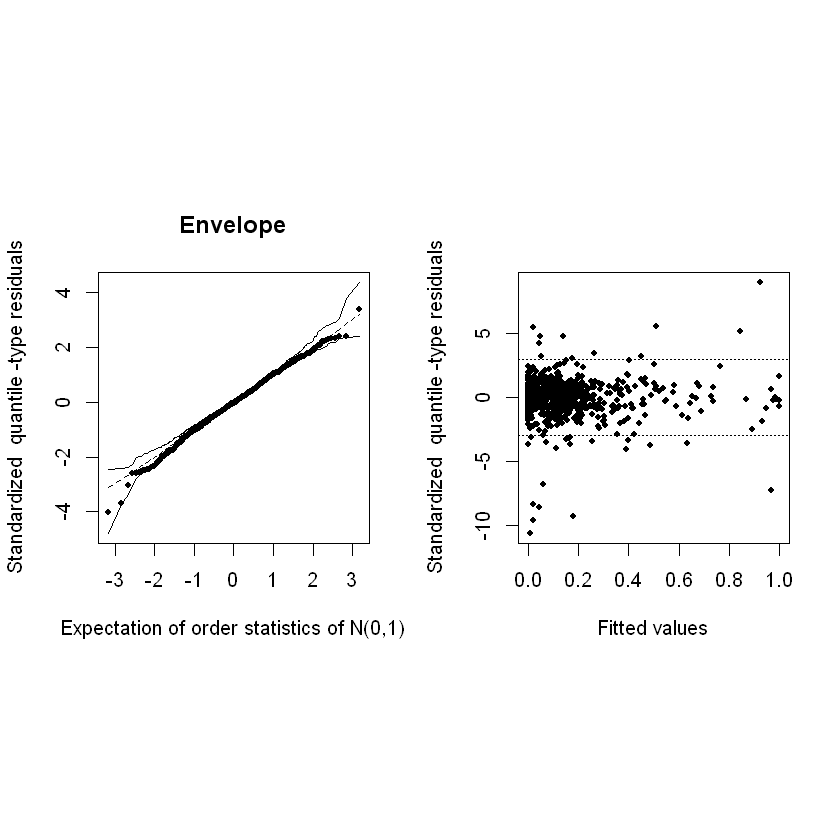

In [59]:
par(mfrow=c(1,2))
envelope_glm(fitmejor,conf = 0.9, main="Envelope")
residuals_glm(fit11)  

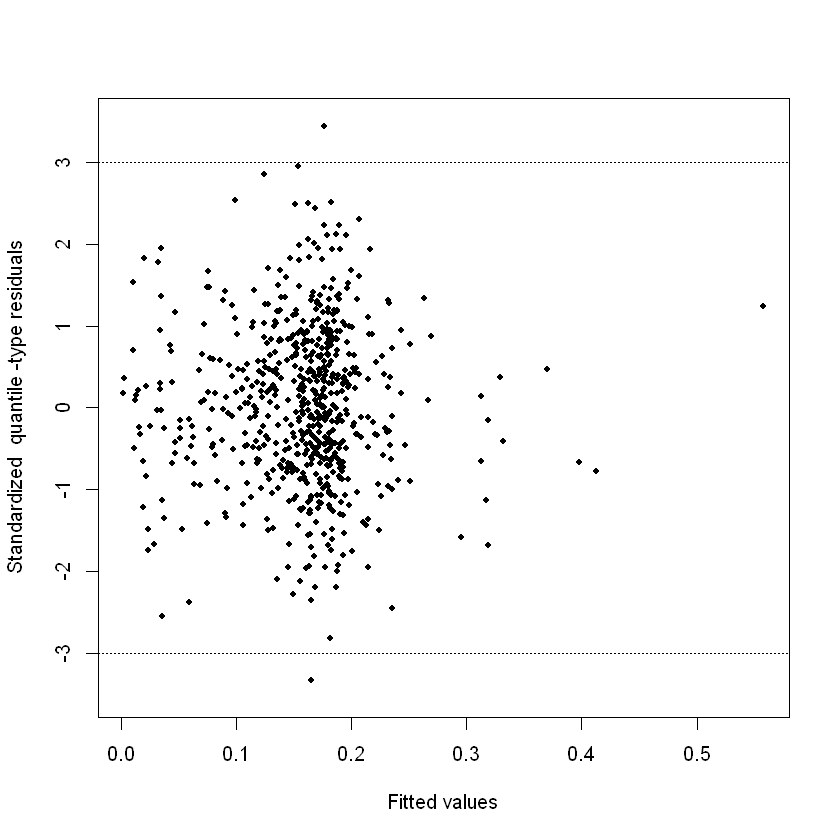

In [98]:
residuals_glm(fit11)   #Por default residuos quantile

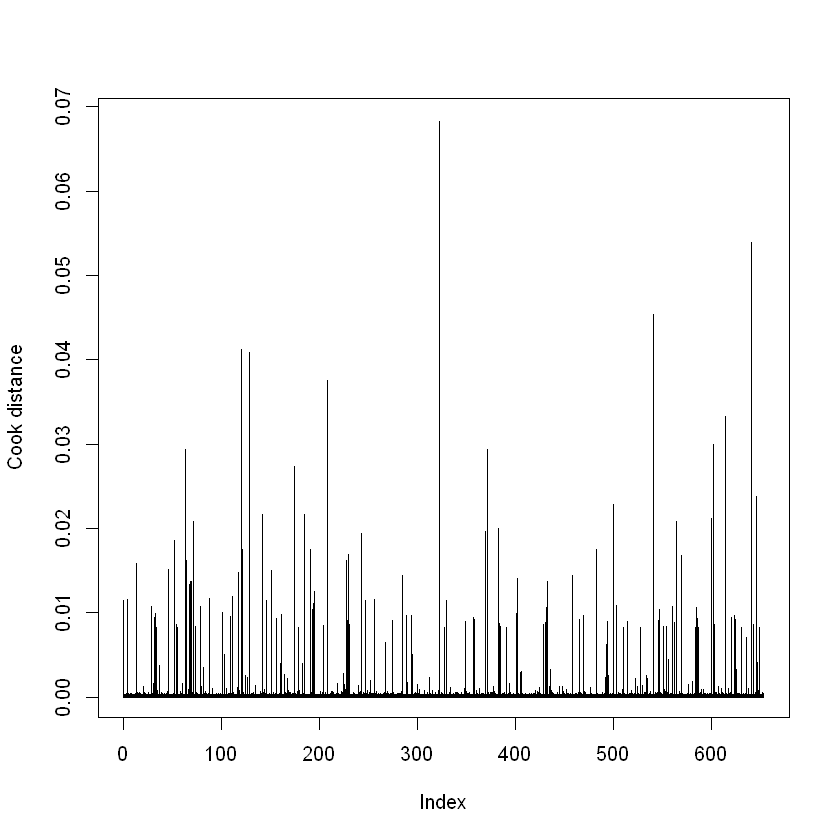

In [99]:
Cookdis_glm(fitmejor)   #hay que quitar la observacion mas alta

In [60]:
vdtest(fit11)
bptest(fit11,studentize=FALSE)

ERROR: Error: Only gaussian, Gamma and inverse.gaussian families are supported!!


### ¿Qué sucede si quitamos los puntos alto leverage?

Quitando el dato 325 se tiene:

# REFERENCIAS

Para poder instalar paquetes en jupyter, uso la siguiente linea.

* install.packages("glmx", "/Users/YULY/anaconda/Lib/R/library")